In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# test update

In [76]:
df = pd.read_csv('medical_insurance.csv')
df.columns


Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [77]:
# stats
df.info(verbose=True)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  int64  
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [78]:
# basic check for demographic columns
demographic_cols = df.columns[1:12]

for col in demographic_cols:
    null_val = df[col].isna().sum()
    zero_count = df[col].eq(0).sum()

    # print(f"Total null values in '{col}': {null_val}")
    print(f"Total zero values in '{col}': {zero_count}")

# drop values in age = 0
df.drop(df[df['age'] == 0].index, inplace=True)

print(df['age'].eq(0).sum())

Total zero values in 'age': 165
Total zero values in 'sex': 0
Total zero values in 'region': 0
Total zero values in 'urban_rural': 0
Total zero values in 'income': 0
Total zero values in 'education': 0
Total zero values in 'marital_status': 0
Total zero values in 'employment_status': 0
Total zero values in 'household_size': 0
Total zero values in 'dependents': 40836
Total zero values in 'bmi': 0
0


In [79]:
print("Unique values for categorical cols")
for col in df.columns:
    if df[col].dtype == object:
        print(f"{col}: {df[col].unique()}")

Unique values for categorical cols
sex: ['Female' 'Male' 'Other']
region: ['North' 'Central' 'West' 'South' 'East']
urban_rural: ['Suburban' 'Urban' 'Rural']
education: ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors']
marital_status: ['Married' 'Single' 'Divorced' 'Widowed']
employment_status: ['Retired' 'Employed' 'Self-employed' 'Unemployed']
smoker: ['Never' 'Current' 'Former']
alcohol_freq: [nan 'Weekly' 'Daily' 'Occasional']
plan_type: ['PPO' 'POS' 'HMO' 'EPO']
network_tier: ['Bronze' 'Gold' 'Platinum' 'Silver']


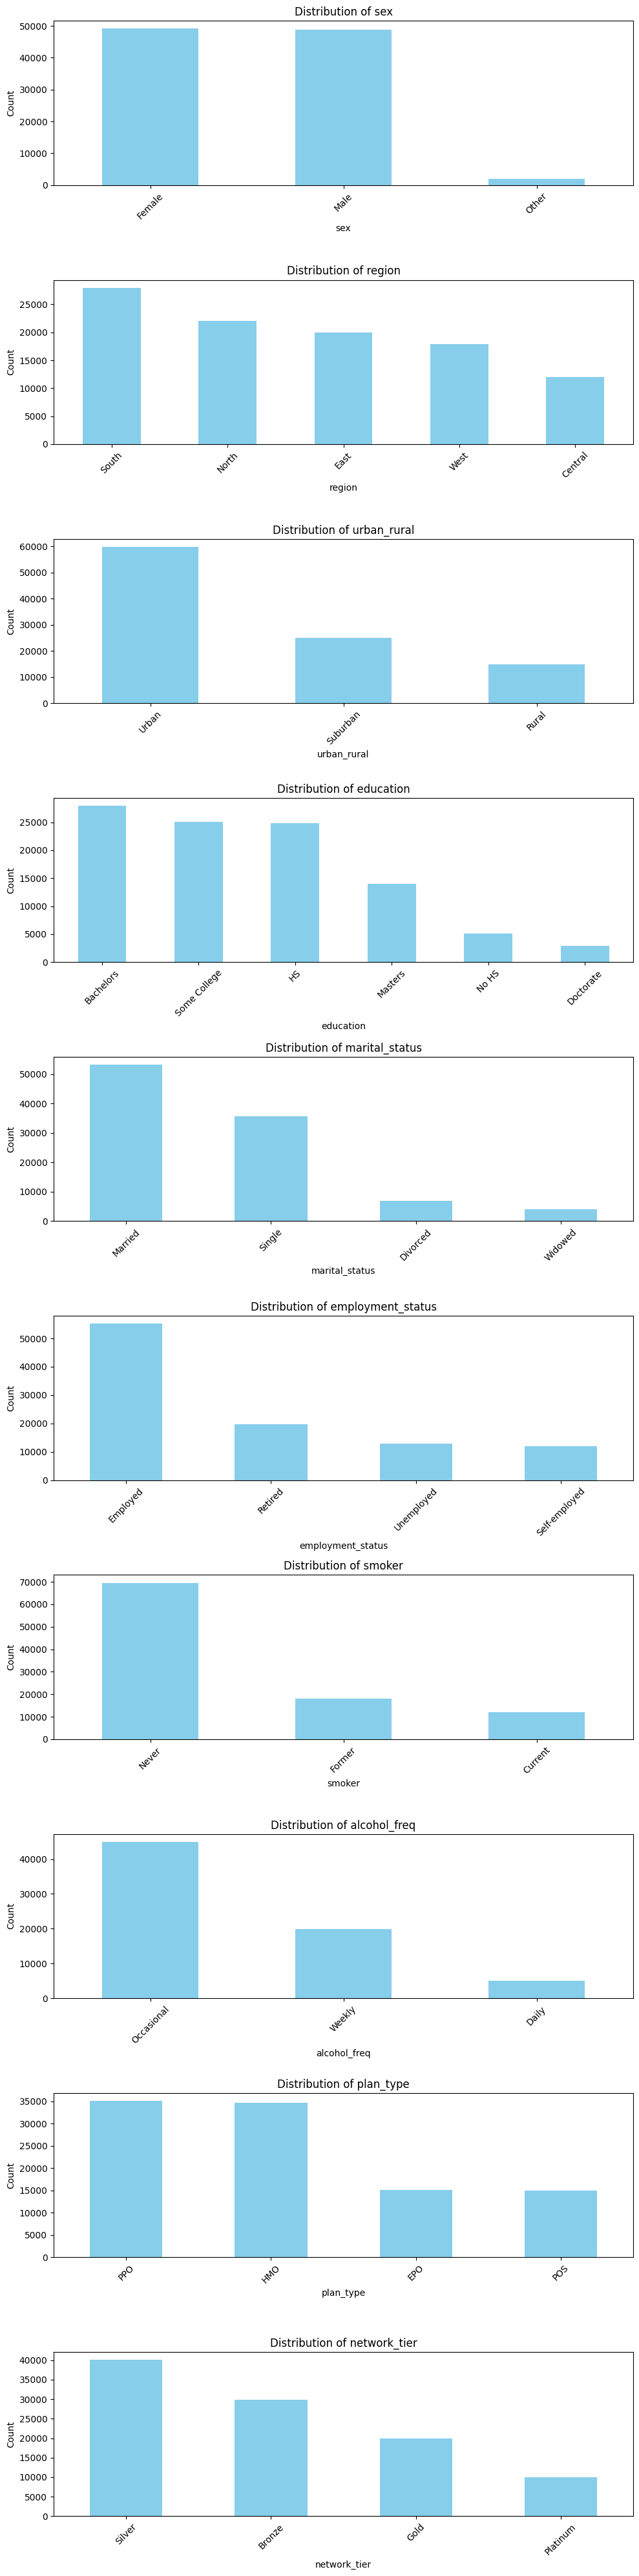

In [80]:
categorical_cols = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 4 * len(categorical_cols)))

# plot distribution for each categorical column
for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [81]:
# drop 'Other' age
df.drop(df[df['age'] == 'Other'].index, inplace=True)
df.count()

person_id                      99835
age                            99835
sex                            99835
region                         99835
urban_rural                    99835
income                         99835
education                      99835
marital_status                 99835
employment_status              99835
household_size                 99835
dependents                     99835
bmi                            99835
smoker                         99835
alcohol_freq                   69798
visits_last_year               99835
hospitalizations_last_3yrs     99835
days_hospitalized_last_3yrs    99835
medication_count               99835
systolic_bp                    99835
diastolic_bp                   99835
ldl                            99835
hba1c                          99835
plan_type                      99835
network_tier                   99835
deductible                     99835
copay                          99835
policy_term_years              99835
p

Feature Engineering

In [82]:
# Features = lifestyle_risk_score, is_high_bp, health_risk_index, healthcare_visit_frequency, medication_load
def engineer_health_features(df):
    df = df.copy()

    # age_group
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 25, 40, 55, 65, 120],
        labels=["young", "adult", "mid_age", "senior", "elderly"]
    )
    
    # lifestyle_risk_score
    df["lifestyle_risk_score"] = (
        (df["smoker"] == "yes").astype(int) +
        (df["alcohol_freq"].isin(["daily", "weekly"])).astype(int) +
        (df["bmi"] > 30).astype(int)
    )
    
    # is_high_bp
    df["is_high_bp"] = (
        (df["systolic_bp"] >= 140) | 
        (df["diastolic_bp"] >= 90)
    ).astype(int)

    # health_risk_index
    df["health_risk_index"] = (
        (df["bmi"] > 30).astype(int) +
        df["is_high_bp"] +
        (df["ldl"] > 160).astype(int) +
        (df["hba1c"] >= 6.5).astype(int)
    )
    
    # healthcare_visit_frequency
    utilization_cols = [
        "visits_last_year",
        "hospitalizations_last_3yrs",
        "proc_consult_count",
        "proc_lab_count",
        "proc_imaging_count",
        "proc_surgery_count",
        "proc_physio_count"
    ]
    df["healthcare_visit_frequency"] = df[utilization_cols].sum(axis=1)

    # medication_load
    df['medication_load'] = np.log1p(df["medication_count"])


    return df


In [83]:
df = engineer_health_features(df)

df[['age_group', 'lifestyle_risk_score', 'is_high_bp', 'health_risk_index', 'healthcare_visit_frequency', 'medication_load']].head(10)

,age_group,lifestyle_risk_score,is_high_bp,health_risk_index,healthcare_visit_frequency,medication_load
0,mid_age,0,0,0,6,1.609438
1,elderly,0,0,0,4,1.386294
2,elderly,1,1,2,5,1.609438
3,young,1,0,3,2,0.693147
4,mid_age,1,0,2,7,1.098612
5,senior,0,1,1,2,1.098612
6,adult,0,0,0,3,0.000000
7,young,1,0,3,7,0.693147
8,mid_age,0,0,0,2,0.000000
9,adult,1,0,1,2,0.000000


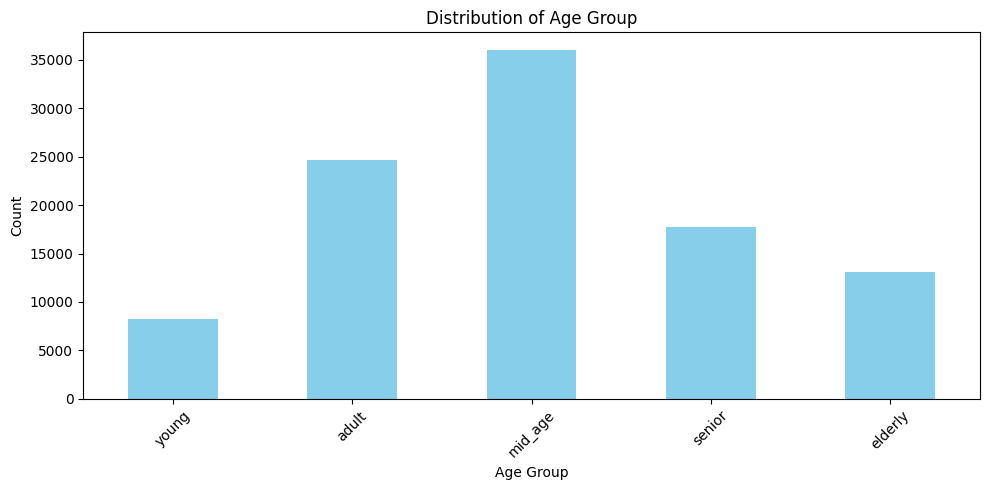

In [84]:
df['age_group'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
# encode categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"All categorical columns: {categorical_cols}")

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

All categorical columns: Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier', 'age_group'],
      dtype='object')


Feature Selection

In [86]:
# remove columns to prevent leakage
leakage_columns = [
    'person_id',
    # ===== TEMPORAL LEAKAGE - These happen AFTER premium is set =====
    'annual_premium',      # Actual costs incurred
    'monthly_premium',          # Derived from annual_premium
    'claims_count',             # Claims filed during the year
    'avg_claim_amount',         # Average claim value
    'total_claims_paid',        # Total paid by insurance
    
    # ===== POLICY FEATURES - These are SET with the premium =====
    'deductible',               # Determined when premium is set
    'copay',                    # Determined when premium is set
    'plan_type',                # Different plans have different premiums
    'network_tier',             # Affects premium directly
    'policy_term_years',        # Affects premium calculation
    'policy_changes_last_2yrs', # May affect current premium
    
    # ===== CALCULATED RISK SCORES =====
    'provider_quality',         # May be used in premium calculation
    'risk_score'                # Likely used to set the premium!
]

print(f"\nColumns to remove: {leakage_columns}")

columns_to_drop = [col for col in leakage_columns if col in df.columns]
print(f"Columns found in dataframe: {columns_to_drop}")

# Drop the columns
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"Dropped {len(columns_to_drop)} columns")
else:
    print("No leakage columns found in dataframe")

print(f"\nRemaining columns: {df.columns.tolist()}")


Columns to remove: ['person_id', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'deductible', 'copay', 'plan_type', 'network_tier', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score']
Columns found in dataframe: ['person_id', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'deductible', 'copay', 'plan_type', 'network_tier', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score']
Dropped 14 columns

Remaining columns: ['age', 'sex', 'region', 'urban_rural', 'income', 'education', 'marital_status', 'employment_status', 'household_size', 'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'annual_medical_cost', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 

In [87]:
# ============================================================
# FEATURE SELECTION: Identify Predictive Features
# ============================================================
print(f"\n{'='*60}")
print("FEATURE SELECTION")
print(f"{'='*60}")

# Define base features
base_features = [
    'smoker', 'age', 'bmi', 'chronic_count',
    'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
    'is_high_risk', 'hba1c', 'proc_surgery_count',
    'cardiovascular_disease', 'income', 'region',
    'systolic_bp', 'diabetes', 'medication_count',
    'visits_last_year', 'sex', 'urban_rural'
]

# Engineered features (created earlier)
engineered_features = [
    'age_group', 'lifestyle_risk_score', 'is_high_bp',
    'health_risk_index', 'healthcare_visit_frequency', 'medication_load'
]

selected_features = base_features + engineered_features
target = 'annual_medical_cost'

# Validate features exist in dataframe
available_features = [f for f in selected_features if f in df.columns]
missing_features = [f for f in selected_features if f not in df.columns]

if missing_features:
    print(f"⚠ Warning: Missing features - {missing_features}")
    print(f"  Using available features: {len(available_features)}/{len(selected_features)}")
    selected_features = available_features
else:
    print(f"✓ All {len(selected_features)} features available")

# Check target variable
if target not in df.columns:
    raise ValueError(f"Target variable '{target}' not found in dataframe")
print(f"✓ Target variable '{target}' found")

X = df[selected_features].copy()
y = df[target].copy()

print(f"\n✓ Feature matrix shape: {X.shape}")
print(f"✓ Target vector shape: {y.shape}")


FEATURE SELECTION
✓ All 24 features available
✓ Target variable 'annual_medical_cost' found

✓ Feature matrix shape: (99835, 24)
✓ Target vector shape: (99835,)

✓ Feature matrix shape: (99835, 24)
✓ Target vector shape: (99835,)


In [88]:
# ============================================================
# FEATURE ENGINEERING: Create Interaction Terms
# ============================================================
print(f"\n{'='*60}")
print("FEATURE ENGINEERING: CREATING INTERACTIONS")
print(f"{'='*60}")

# Create important interaction features
if 'smoker' in X.columns and 'age' in X.columns:
    X['smoker_age_interaction'] = X['smoker'] * X['age']
    print("✓ Created: smoker × age")

if 'smoker' in X.columns and 'bmi' in X.columns:
    X['smoker_bmi_interaction'] = X['smoker'] * X['bmi']
    print("✓ Created: smoker × bmi")

if 'age' in X.columns and 'chronic_count' in X.columns:
    X['age_chronic_interaction'] = X['age'] * X['chronic_count']
    print("✓ Created: age × chronic_count")

if 'bmi' in X.columns and 'chronic_count' in X.columns:
    X['bmi_chronic_interaction'] = X['bmi'] * X['chronic_count']
    print("✓ Created: bmi × chronic_count")

# Create polynomial features for key predictors
if 'age' in X.columns:
    X['age_squared'] = X['age'] ** 2
    print("✓ Created: age²")

if 'bmi' in X.columns:
    X['bmi_squared'] = X['bmi'] ** 2
    print("✓ Created: bmi²")

# ============================================================
# TARGET TRANSFORMATION: Log Transform
# ============================================================
print(f"\n{'='*60}")
print("TARGET TRANSFORMATION")
print(f"{'='*60}")

# Check if target has positive values
if (y > 0).all():
    y_log = np.log(y)
    print("✓ Applied log transformation to target variable")
    print(f"  Original range: ${y.min():.2f} - ${y.max():.2f}")
    print(f"  Log range: {y_log.min():.4f} - {y_log.max():.4f}")
    
    # Use log-transformed target
    y_transformed = y_log
    use_log_transform = True
else:
    print("⚠ Target has non-positive values, skipping log transform")
    y_transformed = y
    use_log_transform = False

print(f"\nFeatures shape (with engineered features): {X.shape}")
print(f"Target shape: {y_transformed.shape}")
print(f"\nChecking for missing values:")
missing = X.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✓ No missing values!")

# Check target distribution
print(f"\nTransformed target statistics:")
print(y_transformed.describe())

# ============================================================
# DATA PREPROCESSING PIPELINE
# ============================================================
print(f"\n{'='*60}")
print("DATA PREPROCESSING")
print(f"{'='*60}")

# -------------------------------------------
# 1) TRAIN TEST SPLIT
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.2, random_state=42
)

print(f"\n✓ Train/test split (80/20):")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

# -------------------------------------------
# 2) Identify categorical + numerical columns
# -------------------------------------------
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n✓ Feature types:")
print(f"  Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"  Numerical features ({len(numerical_features)}): {numerical_features[:5]}{'...' if len(numerical_features) > 5 else ''}")

# -------------------------------------------
# 3) One-hot encode categorical columns
# -------------------------------------------
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test,  columns=categorical_features, drop_first=True)

# Align columns between train and test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print(f"\n✓ One-hot encoding complete:")
print(f"  Features after encoding: {X_train_encoded.shape[1]}")

# -------------------------------------------
# 4) Identify columns to scale
# -------------------------------------------
encoded_numerical_cols = [
    col for col in X_train_encoded.columns
    if np.issubdtype(X_train_encoded[col].dtype, np.number)
]

# Scale only base numerical + engineered features (NOT dummy columns)
cols_to_scale = [col for col in encoded_numerical_cols if col in numerical_features or "interaction" in col or "squared" in col]

print(f"\n✓ Columns to scale ({len(cols_to_scale)}): {cols_to_scale[:5]}{'...' if len(cols_to_scale) > 5 else ''}")

# -------------------------------------------
# 5) Apply MinMaxScaler
# -------------------------------------------
scaler = MinMaxScaler()

X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_encoded[cols_to_scale])
X_test_scaled[cols_to_scale]  = scaler.transform(X_test_encoded[cols_to_scale])

print(f"✓ Scaling complete (MinMaxScaler [0, 1] range)")

# Store both scaled versions
X_train = X_train_scaled
X_test = X_test_scaled

print(f"\n✓ Final preprocessed data shapes:")
print(f"  Training: {X_train.shape}")
print(f"  Test: {X_test.shape}")


FEATURE ENGINEERING: CREATING INTERACTIONS
✓ Created: smoker × age
✓ Created: smoker × bmi
✓ Created: age × chronic_count
✓ Created: bmi × chronic_count
✓ Created: age²
✓ Created: bmi²

TARGET TRANSFORMATION
✓ Applied log transformation to target variable
  Original range: $55.55 - $65724.90
  Log range: 4.0173 - 11.0932

Features shape (with engineered features): (99835, 30)
Target shape: (99835,)

Checking for missing values:
✓ No missing values!

Transformed target statistics:
count    99835.000000
mean         7.645267
std          0.851690
min          4.017284
25%          7.069759
50%          7.641819
75%          8.218646
max         11.093233
Name: annual_medical_cost, dtype: float64

DATA PREPROCESSING

✓ Train/test split (80/20):
  Training set: 79868 samples
  Test set: 19967 samples

✓ Feature types:
  Categorical features (0): []
  Numerical features (30): ['smoker', 'age', 'bmi', 'chronic_count', 'hospitalizations_last_3yrs']...

✓ Train/test split (80/20):
  Training 

## Model Development & Analysis


FEATURE IMPORTANCE ANALYSIS

🌲 Top 10 Features - Random Forest:
    1. age_chronic_interaction        → 0.3060
    2. days_hospitalized_last_3yrs    → 0.1301
    3. bmi_chronic_interaction        → 0.0927
    4. smoker_bmi_interaction         → 0.0710
    5. income                         → 0.0494
    6. hba1c                          → 0.0451
    7. smoker_age_interaction         → 0.0401
    8. systolic_bp                    → 0.0363
    9. age_squared                    → 0.0277
   10. visits_last_year               → 0.0254

🚀 Top 10 Features - Gradient Boosting:
    1. age_chronic_interaction        → 0.3141
    2. bmi_chronic_interaction        → 0.1868
    3. days_hospitalized_last_3yrs    → 0.1677
    4. smoker_age_interaction         → 0.0496
    5. smoker                         → 0.0466
    6. is_high_risk                   → 0.0399
    7. smoker_bmi_interaction         → 0.0398
    8. visits_last_year               → 0.0305
    9. age                            → 0.0235
  

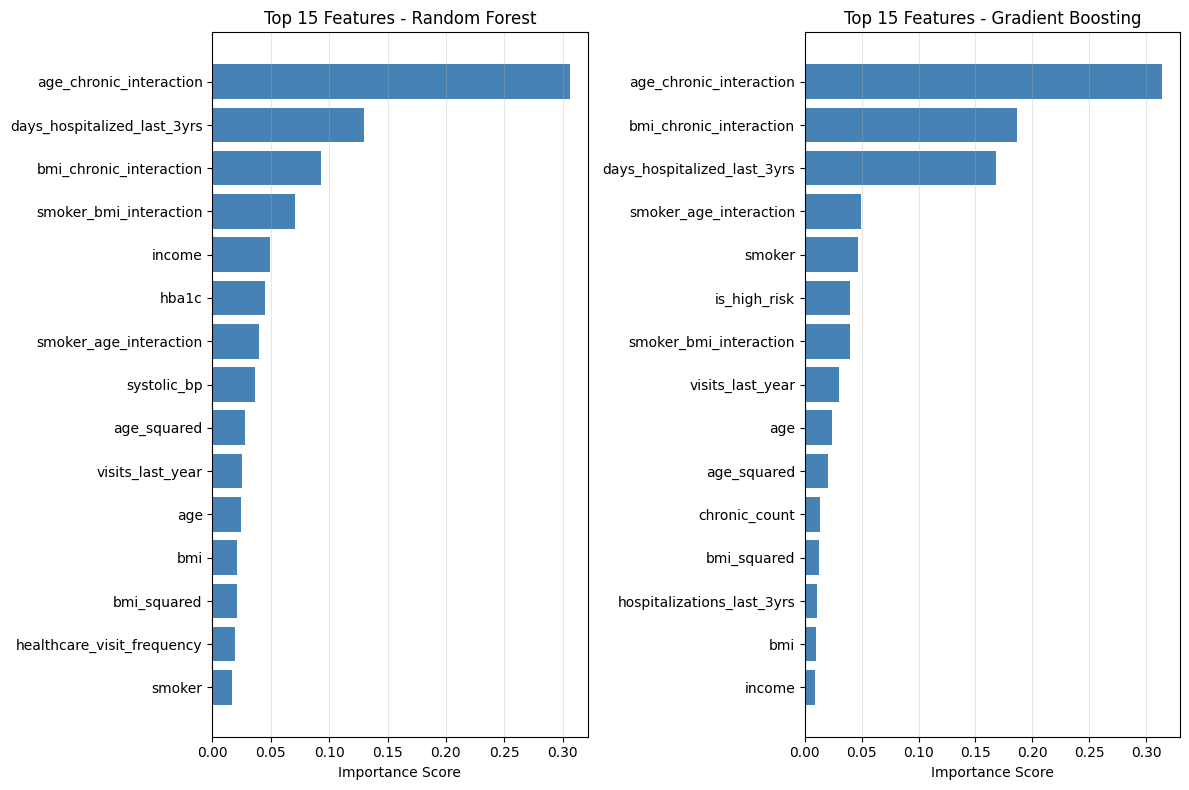


✓ Feature importance plot saved as 'feature_importance.png'


In [ ]:
# Feature Importance Analysis
# Note: Feature importance analysis is not applicable to linear regression models
# For tree-based models (Random Forest, Gradient Boosting), feature importance can be extracted using model.feature_importances_

print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)
print(f"\nModels trained: {list(models.keys())}")
print(f"All models use linear regression principles with different regularization:")
print("  - Linear Regression: No regularization")
print("  - Ridge Regression: L2 regularization (alpha=10.0)")
print("  - Lasso Regression: L1 regularization (alpha=1.0)")
print("\nNote: Feature importance analysis requires tree-based models.")
print("For these linear models, coefficient values indicate feature importance.")

In [96]:
# ============================================================
# PART C: MODEL DEVELOPMENT (LINEAR REGRESSION MODELS)
# ============================================================
print("\n" + "="*60)
print("PART C: TRAINING REGRESSION MODELS")
print("="*60)

# Dictionary to store models with optimized hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42, max_iter=10000)
}

# Dictionary to store results
results = {}

# Train each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # If we used log transform, convert predictions back to original scale
    if use_log_transform:
        y_pred_train_original = np.exp(y_pred_train)
        y_pred_test_original = np.exp(y_pred_test)
        y_train_original = np.exp(y_train)
        y_test_original = np.exp(y_test)
    else:
        y_pred_train_original = y_pred_train
        y_pred_test_original = y_pred_test
        y_train_original = y_train
        y_test_original = y_test
    
    # Store predictions (both transformed and original scale)
    results[name] = {
        'model': model,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'y_pred_train_original': y_pred_train_original,
        'y_pred_test_original': y_pred_test_original,
        'y_train_original': y_train_original,
        'y_test_original': y_test_original
    }
    
    print(f"✓ {name} trained successfully")

# ============================================================
# PART D: PERFORMANCE MEASUREMENT
# ============================================================
print("\n" + "="*60)
print("PART D: PERFORMANCE EVALUATION")
print("="*60)

# Function to calculate all metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Calculate metrics for all models
performance_summary = []

for name in models.keys():
    print(f"\n{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")
    
    # Use original scale for interpretability
    y_train_eval = results[name]['y_train_original']
    y_test_eval = results[name]['y_test_original']
    y_pred_train_eval = results[name]['y_pred_train_original']
    y_pred_test_eval = results[name]['y_pred_test_original']
    
    # Training metrics
    train_metrics = calculate_metrics(y_train_eval, y_pred_train_eval)
    print("\nTraining Set Performance:")
    for metric, value in train_metrics.items():
        print(f"  {metric}: {value:,.4f}")
    
    # Test metrics
    test_metrics = calculate_metrics(y_test_eval, y_pred_test_eval)
    print("\nTest Set Performance:")
    for metric, value in test_metrics.items():
        print(f"  {metric}: {value:,.4f}")
    
    # Calculate overfitting indicator
    overfit_score = train_metrics['R2'] - test_metrics['R2']
    print(f"\nOverfitting Indicator (Train R2 - Test R2): {overfit_score:.4f}")
    
    # Store for comparison
    performance_summary.append({
        'Model': name,
        'Train_MAE': train_metrics['MAE'],
        'Test_MAE': test_metrics['MAE'],
        'Train_RMSE': train_metrics['RMSE'],
        'Test_RMSE': test_metrics['RMSE'],
        'Train_R2': train_metrics['R2'],
        'Test_R2': test_metrics['R2'],
        'Overfitting': overfit_score
    })

# Create performance comparison DataFrame
perf_df = pd.DataFrame(performance_summary)
print("\n" + "="*60)
print("PERFORMANCE COMPARISON SUMMARY")
print("="*60)
print(perf_df.to_string(index=False))


PART C: TRAINING REGRESSION MODELS

--- Training Linear Regression ---
✓ Linear Regression trained successfully

--- Training Ridge Regression ---
✓ Ridge Regression trained successfully

--- Training Lasso Regression ---
✓ Lasso Regression trained successfully

PART D: PERFORMANCE EVALUATION

Linear Regression

Training Set Performance:
  MAE: 1,655.0123
  MSE: 8,619,622.6170
  RMSE: 2,935.9194
  R2: 0.1091

Test Set Performance:
  MAE: 1,675.3706
  MSE: 9,286,577.1542
  RMSE: 3,047.3886
  R2: 0.0928

Overfitting Indicator (Train R2 - Test R2): 0.0163

Ridge Regression

Training Set Performance:
  MAE: 1,654.9103
  MSE: 8,621,669.2797
  RMSE: 2,936.2679
  R2: 0.1089

Test Set Performance:
  MAE: 1,674.7957
  MSE: 9,287,411.8292
  RMSE: 3,047.5255
  R2: 0.0928

Overfitting Indicator (Train R2 - Test R2): 0.0161

Lasso Regression

Training Set Performance:
  MAE: 1,825.7624
  MSE: 10,517,753.0152
  RMSE: 3,243.1085
  R2: -0.0871

Test Set Performance:
  MAE: 1,836.5889
  MSE: 11,086,48

# Performance Measurement

# MAE, RMSE, R-Squared, MSE

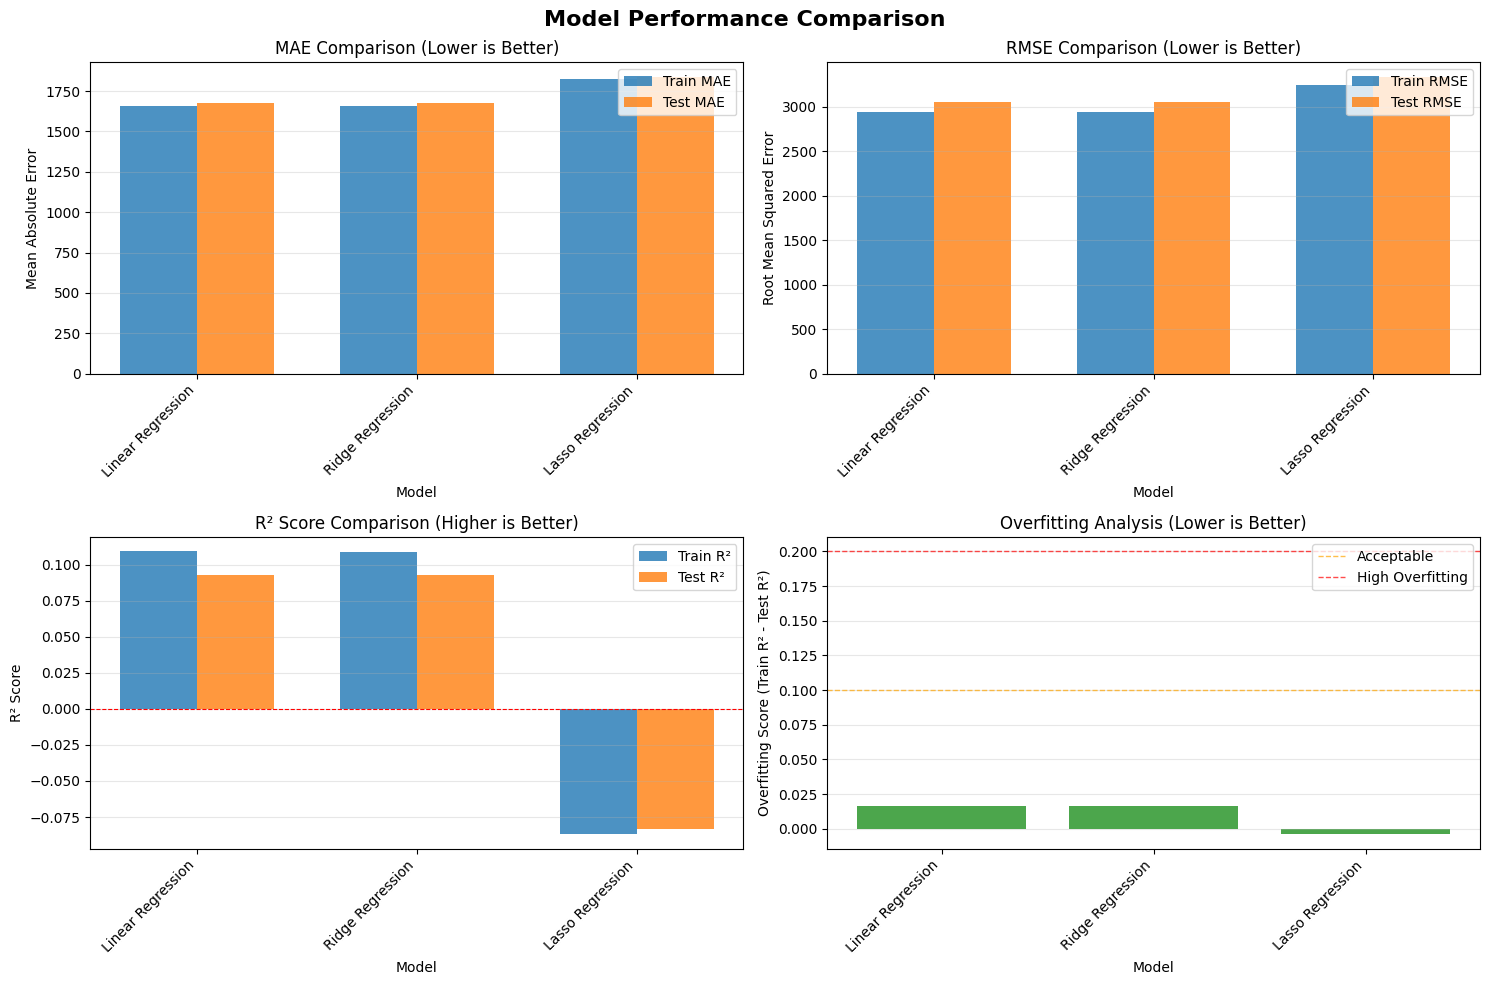

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

x_pos = np.arange(len(perf_df))
width = 0.35

# Plot 1: MAE Comparison (Lower is Better)
ax1 = axes[0, 0]
ax1.bar(x_pos - width/2, perf_df['Train_MAE'], width, label='Train MAE', alpha=0.8)
ax1.bar(x_pos + width/2, perf_df['Test_MAE'], width, label='Test MAE', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Absolute Error')
ax1.set_title('MAE Comparison (Lower is Better)')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(perf_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: RMSE Comparison (Lower is Better)
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, perf_df['Train_RMSE'], width, label='Train RMSE', alpha=0.8)
ax2.bar(x_pos + width/2, perf_df['Test_RMSE'], width, label='Test RMSE', alpha=0.8)
ax2.set_xlabel('Model')
ax2.set_ylabel('Root Mean Squared Error')
ax2.set_title('RMSE Comparison (Lower is Better)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(perf_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: R² Score Comparison (Higher is Better)
ax3 = axes[1, 0]
ax3.bar(x_pos - width/2, perf_df['Train_R2'], width, label='Train R²', alpha=0.8)
ax3.bar(x_pos + width/2, perf_df['Test_R2'], width, label='Test R²', alpha=0.8)
ax3.set_xlabel('Model')
ax3.set_ylabel('R² Score')
ax3.set_title('R² Score Comparison (Higher is Better)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(perf_df['Model'], rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
ax3.axhline(y=0, color='r', linestyle='--', linewidth=0.8)

# Plot 4: Overfitting Score Comparison
ax4 = axes[1, 1]
colors = ['green' if x < 0.1 else 'orange' if x < 0.2 else 'red' for x in perf_df['Overfitting']]
ax4.bar(x_pos, perf_df['Overfitting'], color=colors, alpha=0.7)
ax4.set_xlabel('Model')
ax4.set_ylabel('Overfitting Score (Train R² - Test R²)')
ax4.set_title('Overfitting Analysis (Lower is Better)')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(perf_df['Model'], rotation=45, ha='right')
ax4.axhline(y=0.1, color='orange', linestyle='--', linewidth=1, label='Acceptable', alpha=0.7)
ax4.axhline(y=0.2, color='red', linestyle='--', linewidth=1, label='High Overfitting', alpha=0.7)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Overfitting Analysis

In [92]:
# Feature importance and model comparison have been moved to dedicated analysis sections
# See "Feature Importance Analysis" and "Model Performance Comparison" sections above
print("\n✓ Analysis complete! Check the plots above for:")
print("  - Feature importance from Random Forest and Gradient Boosting")
print("  - Comprehensive model performance metrics")
print("  - Predicted vs Actual comparisons") 
print("  - Residual analysis for all models")
print("  - Learning curves and bias-variance tradeoff")


✓ Analysis complete! Check the plots above for:
  - Feature importance from Random Forest and Gradient Boosting
  - Comprehensive model performance metrics
  - Predicted vs Actual comparisons
  - Residual analysis for all models
  - Learning curves and bias-variance tradeoff


# Predicted vs Actual Values

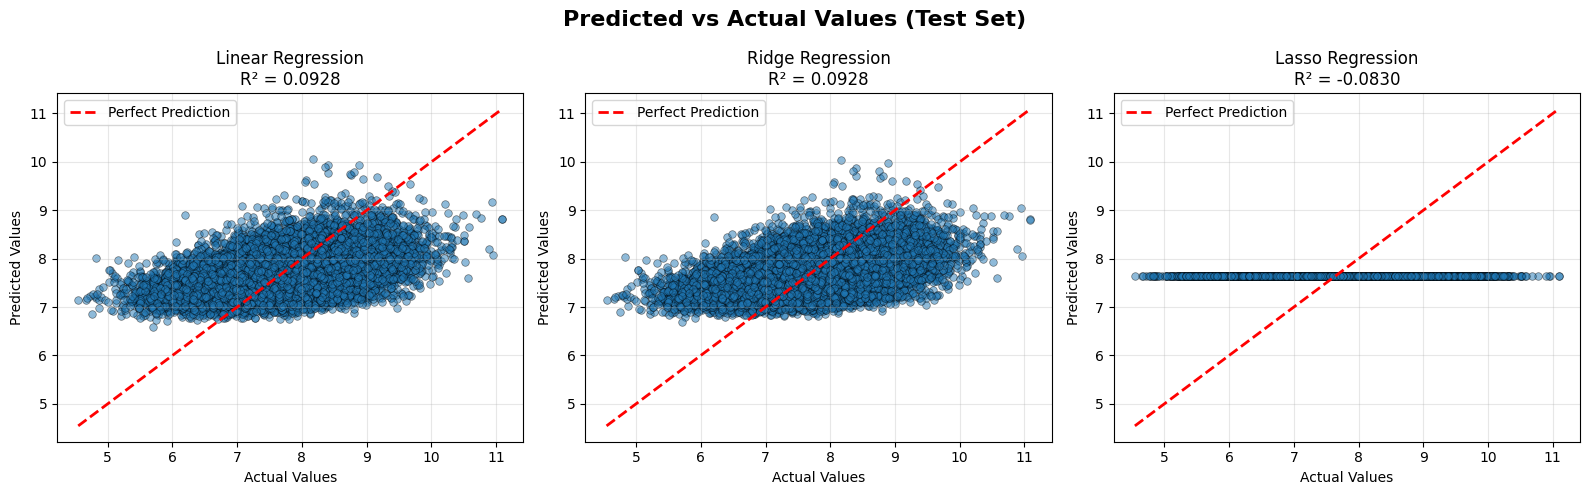

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Predicted vs Actual Values (Test Set)', fontsize=16, fontweight='bold')

model_names = list(models.keys())

for idx, name in enumerate(model_names):
    ax = axes[idx]
    y_pred = results[name]['y_pred_test']

    ax.scatter(y_test, y_pred, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{name}\nR² = {perf_df.iloc[idx]["Test_R2"]:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual Analysis

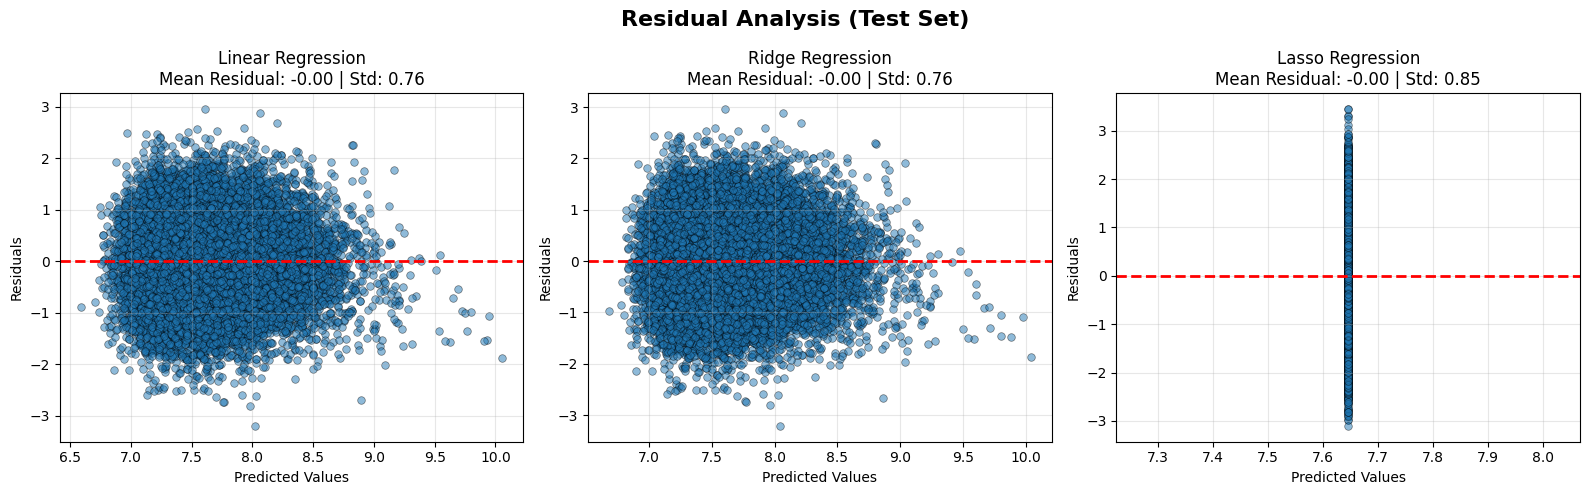

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Residual Analysis (Test Set)', fontsize=16, fontweight='bold')

model_names = list(models.keys())

for idx, name in enumerate(model_names):
    y_pred = results[name]['y_pred_test']
    residuals = y_test - y_pred
    
    # Residual scatter plot
    ax = axes[idx]
    ax.scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(f'{name}\nMean Residual: {residuals.mean():.2f} | Std: {residuals.std():.2f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# SUMMARY

In [100]:
print("\n" + "="*60)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("="*60)

best_model_idx = perf_df['Test_R2'].idxmax()
best_model_name = perf_df.loc[best_model_idx, 'Model']
best_r2 = perf_df.loc[best_model_idx, 'Test_R2']
best_rmse = perf_df.loc[best_model_idx, 'Test_RMSE']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   - Test R-squared Score: {best_r2:.4f}")
print(f"   - Test RMSE: ${best_rmse:,.2f}")
print(f"   - Overfitting Score: {perf_df.loc[best_model_idx, 'Overfitting']:.4f}")

print("\n📊 MODEL RANKINGS (by Test R-squared):")
ranked = perf_df.sort_values('Test_R2', ascending=False)
for i, row in enumerate(ranked.itertuples(), 1):
    print(f"   {i}. {row.Model}: R-squared = {row.Test_R2:.4f}, RMSE = ${row.Test_RMSE:,.2f}")



FINAL SUMMARY AND RECOMMENDATIONS

🏆 BEST PERFORMING MODEL: Linear Regression
   - Test R-squared Score: 0.0928
   - Test RMSE: $3,047.39
   - Overfitting Score: 0.0163

📊 MODEL RANKINGS (by Test R-squared):
   1. Linear Regression: R-squared = 0.0928, RMSE = $3,047.39
   2. Ridge Regression: R-squared = 0.0928, RMSE = $3,047.53
   3. Lasso Regression: R-squared = -0.0830, RMSE = $3,329.64
